In [1]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence  # newly learnt this time!

#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef

#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm


plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
sns.set(font_scale = 1)  
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

print("Let's start!")

Let's start!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("Cervical Cancer After Removal of Features_Data.csv")
data.head(10)

,AG,NSP,FSI,NP,SY,SPY,HC,HCY,IUD,IUDY,STD,STN,STDC,STDVP,STDS,STDGH,STDHI,STDND,STDFD,STDLD,DC,DCN,DHP,DX,HM,SC,CL,CC
0,18,4.0,15.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.266973,2.8,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
data.shape

(835, 28)

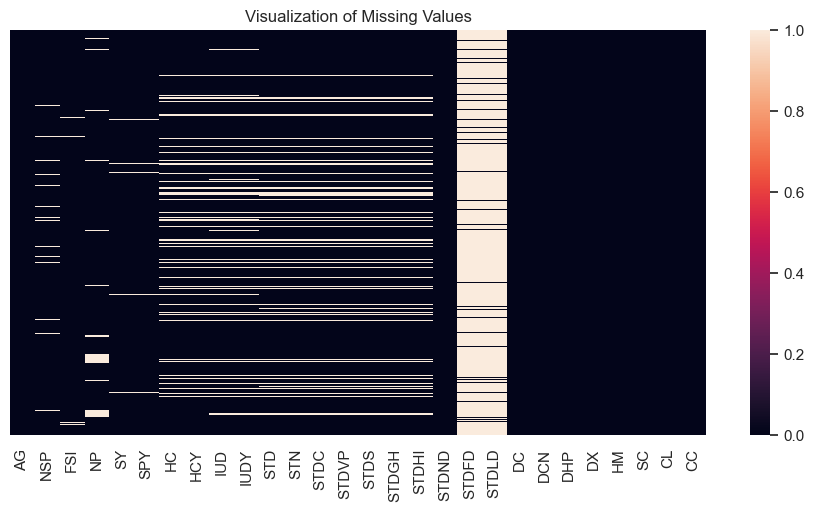

In [5]:
#let's visualize this
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels= False)
plt.title("Visualization of Missing Values")
plt.show()

In [6]:
#del data['STDFD']
data.isnull().sum()

AG         0
NSP       25
FSI        7
NP        56
SY        13
SPY       13
HC       103
HCY      103
IUD      112
IUDY     112
STD      100
STN      100
STDC     100
STDVP    100
STDS     100
STDGH    100
STDHI    100
STDND      0
STDFD    764
STDLD    764
DC         0
DCN        0
DHP        0
DX         0
HM         0
SC         0
CL         0
CC         0
dtype: int64

In [7]:
data['NSP'].fillna(int(data['NSP'].mean()), inplace=True)
data['FSI'].fillna(int(data['FSI'].mean()), inplace=True)
data['NP'].fillna(int(data['NP'].mean()), inplace=True)
data['SY'].fillna(int(data['SY'].mean()), inplace=True)
data['SPY'].fillna(int(data['SPY'].mean()), inplace=True)
data['HC'].fillna(int(data['HC'].mean()), inplace=True)
data['HCY'].fillna(int(data['HCY'].mean()), inplace=True)
data['IUD'].fillna(int(data['IUD'].mean()), inplace=True)
data['IUDY'].fillna(int(data['IUDY'].mean()), inplace=True)
data['STD'].fillna(int(data['STD'].mean()), inplace=True)
data['STN'].fillna(int(data['STN'].mean()), inplace=True)
data['STDC'].fillna(int(data['STDC'].mean()), inplace=True)
data['STDVP'].fillna(int(data['STDVP'].mean()), inplace=True)
data['STDS'].fillna(int(data['STDS'].mean()), inplace=True)
data['STDGH'].fillna(int(data['STDGH'].mean()), inplace=True)
data['STDHI'].fillna(int(data['STDHI'].mean()), inplace=True)
data['STDFD'].fillna(int(data['STDFD'].mean()), inplace=True)
data['STDLD'].fillna(int(data['STDLD'].mean()), inplace=True)

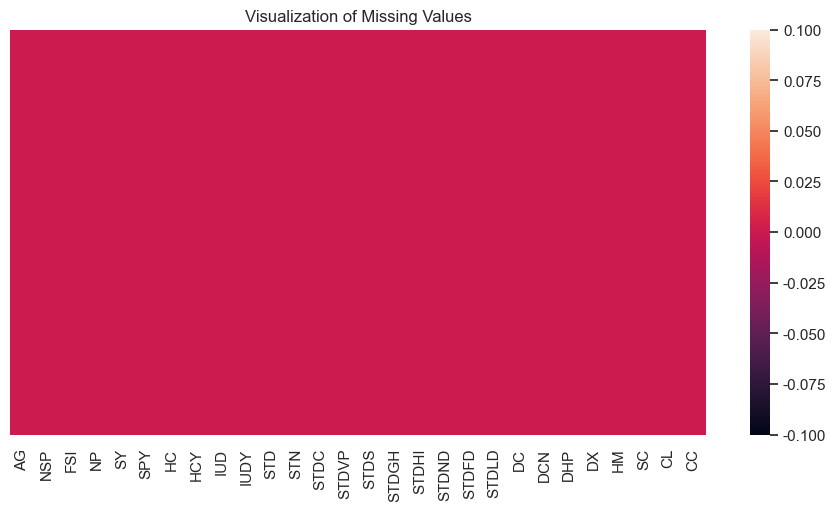

In [8]:
#let's visualize this
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels= False)
plt.title("Visualization of Missing Values")
plt.show()

In [9]:
# data.plot(color = 'g', kind='box', figsize=(25, 30), subplots=True, layout=(8,5))
# plt.show()

In [10]:
data.head(10)

,AG,NSP,FSI,NP,SY,SPY,HC,HCY,IUD,IUDY,STD,STN,STDC,STDVP,STDS,STDGH,STDHI,STDND,STDFD,STDLD,DC,DCN,DHP,DX,HM,SC,CL,CC
0,18,4.0,15.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.266973,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0


In [11]:
# from sklearn.preprocessing import LabelEncoder
# data.loc[data["BC"] == "B","BC"] = 0
# data.loc[data["BC"] == "M","BC"] = 1

# #convert x axis data to int value
# lb = LabelEncoder() 
# data['BC'] = lb.fit_transform(data['BC'])

In [12]:
#lets describe the data
data.describe()

,AG,NSP,FSI,NP,SY,SPY,HC,HCY,IUD,IUDY,STD,STN,STDC,STDVP,STDS,STDGH,STDHI,STDND,STDFD,STDLD,DC,DCN,DHP,DX,HM,SC,CL,CC
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.00000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.535329,17.020359,2.283832,1.249898,0.458571,0.571257,2.265550,0.099401,0.45685,0.094611,0.159281,0.052695,0.051497,0.021557,0.001198,0.021557,0.089820,6.011976,5.069461,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.654044,2.805154,1.408152,4.108449,2.239363,0.495193,3.553566,0.299379,1.83754,0.292852,0.536236,0.223557,0.221142,0.145319,0.034606,0.145319,0.306335,1.708310,1.682884,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.00000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data['CC'].value_counts()

CC
0    781
1     54
Name: count, dtype: int64

In [14]:
data_boxcox = data.copy()
X = data_boxcox.drop(["CC"],axis=1)
Y = data_boxcox["CC"]

In [15]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.CC==0]
df_minority = data_bal[data_bal.CC==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=True,n_samples=230,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.CC.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=710,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.CC.value_counts())

Downsampled data:->
 CC
0    230
1     54
Name: count, dtype: int64
Upsampled data:->
 CC
0    781
1    710
Name: count, dtype: int64


In [16]:
#classes = ["0", "1","2","3","4","5","6"]
X = df_upsampled.drop(['CC'],axis=1)
Y = df_upsampled['CC']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [17]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import itertools
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [18]:
display(df_upsampled.shape, df_upsampled.head())

(1491, 28)

,AG,NSP,FSI,NP,SY,SPY,HC,HCY,IUD,IUDY,STD,STN,STDC,STDVP,STDS,STDGH,STDHI,STDND,STDFD,STDLD,DC,DCN,DHP,DX,HM,SC,CL,CC
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.0,5.0,0,0,0,0,0,0,0,0


In [19]:
df_info = DataFrameSummary(df_upsampled)
df_info.summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
AG,1491.0,27.840376,8.701539,13.0,21.0,27.0,33.0,84.0,1491,44,0,0%,numeric
NSP,1491.0,2.490275,1.495095,1.0,2.0,2.0,3.0,28.0,1491,12,0,0%,numeric
FSI,1491.0,17.091885,2.807757,10.0,15.0,17.0,18.0,32.0,1491,21,0,0%,numeric
NP,1491.0,2.385647,1.325347,0.0,1.0,2.0,3.0,11.0,1491,11,0,0%,numeric
SY,1491.0,1.502617,4.846286,0.0,0.0,0.0,0.0,37.0,1491,30,0,0%,numeric
SPY,1491.0,0.571356,2.401904,0.0,0.0,0.0,0.0,37.0,1491,62,0,0%,numeric
HC,1491.0,0.619718,0.485619,0.0,0.0,1.0,1.0,1.0,1491,2,0,0%,bool
HCY,1491.0,2.809091,4.597811,0.0,0.0,0.58,3.0,30.0,1491,40,0,0%,numeric
IUD,1491.0,0.134138,0.340915,0.0,0.0,0.0,0.0,1.0,1491,2,0,0%,bool
IUDY,1491.0,0.613997,1.990957,0.0,0.0,0.0,0.0,19.0,1491,26,0,0%,numeric


In [20]:
# Or customize according to what you'd like to know.

df_info2 = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_unique'])

for i in range(0, len(df_upsampled.columns)):
    df_info2.loc[i] = [df_upsampled.columns[i],
                      df_upsampled[df_upsampled.columns[i]].isnull().sum(),
                      df_upsampled[df_upsampled.columns[i]].dtypes,
                      df_upsampled[df_upsampled.columns[i]].nunique()]
    
df_info2

,Name of Col,Num of Null,Dtype,N_unique
0,AG,0,int64,44
1,NSP,0,float64,12
2,FSI,0,float64,21
3,NP,0,float64,11
4,SY,0,float64,30
5,SPY,0,float64,62
6,HC,0,float64,2
7,HCY,0,float64,40
8,IUD,0,float64,2
9,IUDY,0,float64,26


In [21]:
dtype = pd.DataFrame(df_info.summary().loc['types'] == 'numeric')
num_cols = dtype[dtype['types'] == True].index.to_list()
num_cols

['AG',
 'NSP',
 'FSI',
 'NP',
 'SY',
 'SPY',
 'HCY',
 'IUDY',
 'STN',
 'STDND',
 'STDFD',
 'STDLD']

In [22]:
cat_cols = list(set(df_upsampled.columns) - set(num_cols))
cat_cols.remove('CC')

cat_cols

['STDHI',
 'STDC',
 'STD',
 'DX',
 'STDS',
 'DC',
 'IUD',
 'HM',
 'DCN',
 'STDVP',
 'SC',
 'STDGH',
 'CL',
 'DHP',
 'HC']

In [23]:
#!pip install scipy==1.11.4 --user

In [24]:
import pycaret
from pycaret.classification import *

In [25]:
setup(data = df_upsampled, 
      target = 'CC',
      session_id = 42,
      preprocess = True,
      index=False,
      numeric_features = cat_cols
     )
#       silent = True

,Description,Value
0,Session id,42
1,Target,CC
2,Target type,Binary
3,Original data shape,"(10835, 28)"
4,Transformed data shape,"(10835, 28)"
5,Transformed train set shape,"(7584, 28)"
6,Transformed test set shape,"(3251, 28)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


## 1. Stacking with Random Base Models

In [27]:
stacking_rbm= stack_models(estimator_list = [knn, dt, et, gbc, ada], meta_model = svm())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9947,0.9708,1.0000,0.9944,0.9972,0.9594,0.9602
1,0.9974,1.0000,1.0000,0.9972,0.9986,0.9801,0.9803
2,0.9974,0.9849,1.0000,0.9972,0.9986,0.9801,0.9803
3,0.9974,1.0000,1.0000,0.9972,0.9986,0.9801,0.9803
4,0.9974,0.9842,1.0000,0.9972,0.9986,0.9797,0.9799
5,0.9934,0.9950,1.0000,0.9929,0.9965,0.9479,0.9492
6,0.9987,1.0000,1.0000,0.9986,0.9993,0.9899,0.9900
7,0.9987,0.9994,1.0000,0.9986,0.9993,0.9901,0.9902
8,0.9974,0.9962,1.0000,0.9972,0.9986,0.9801,0.9803


In [28]:
evaluate_model(stacking_rbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
# # !pip install shapely
# !pip install shap

In [30]:
import shap
shap.initjs()

In [31]:
explainer=shap.Explainer(stacking_rbm)
shap_values=explainer(X_test)

In [32]:
np.shape(shap_values.values)

(448, 27)

#### 1. Waterfall Plot

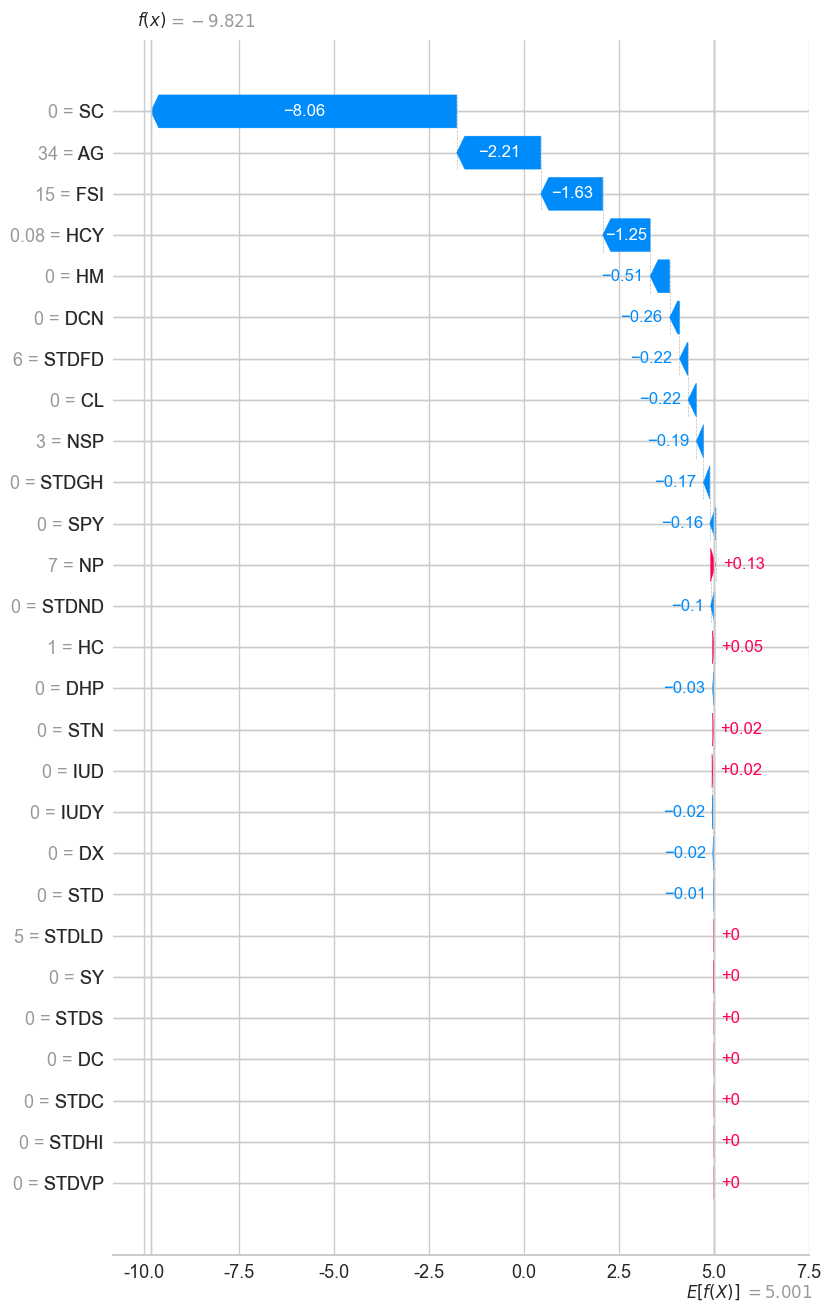

In [33]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

#### 2. Force Plot 

In [34]:
shap.plots.force(shap_values[0])

In [35]:
shap.plots.force(shap_values[0:100])

#### 3. Absolute Mean Shap 

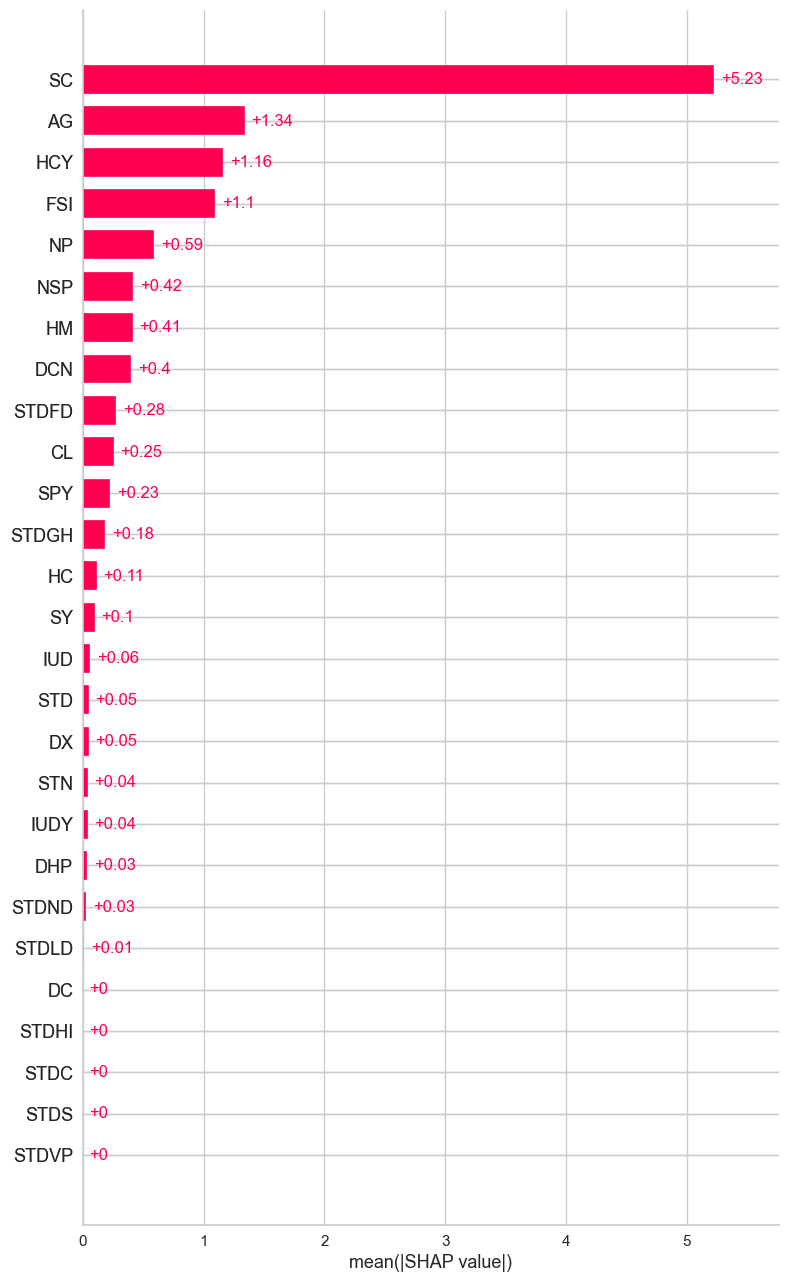

In [36]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

#### 4. Beeswarm Plot 

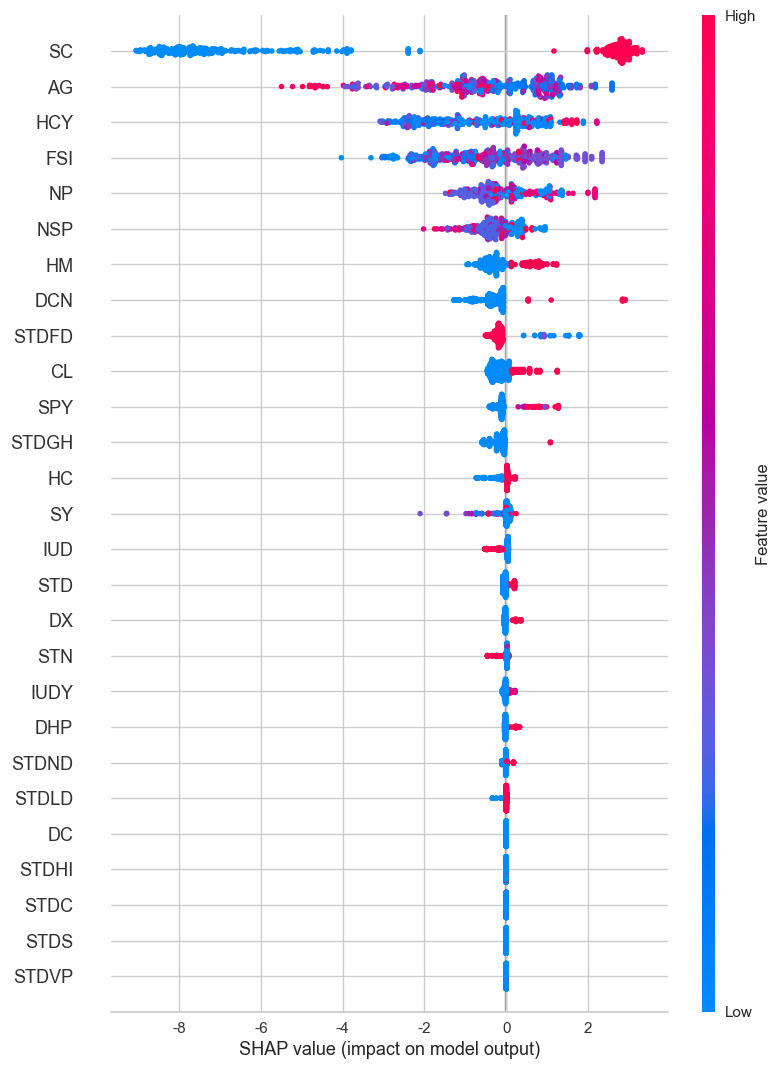

In [37]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

#### 5. Dependence Plots

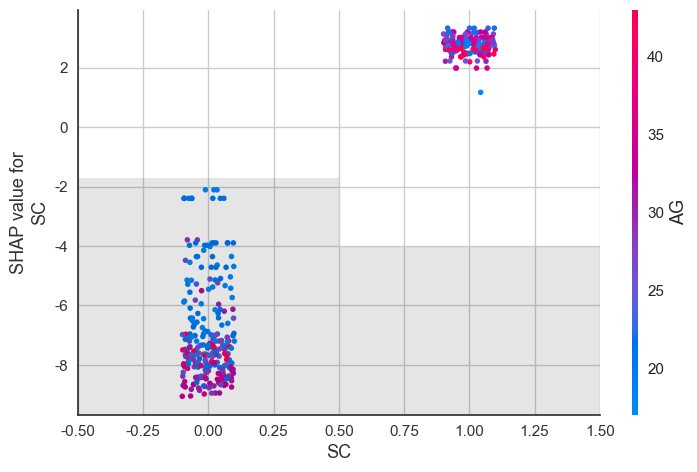

In [38]:
shap.plots.scatter(shap_values[:, "SC"],
                   color=shap_values[:, "AG"])

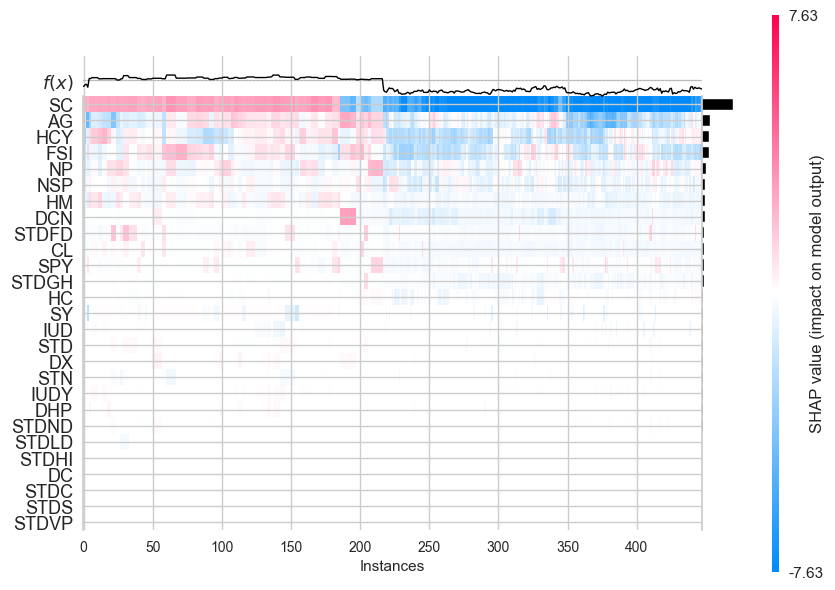

<Axes: xlabel='Instances'>

In [39]:
plt.figure(figsize=(14,7))
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

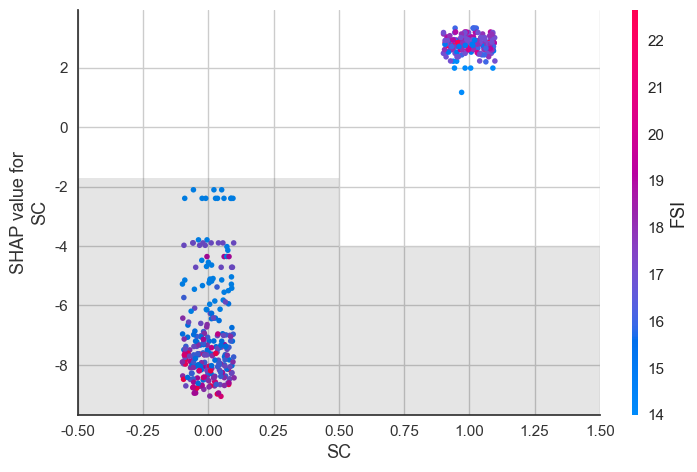

In [40]:
shap.plots.scatter(shap_values[:, "SC"], color=shap_values)

## 2. Stacking with Best Base Models

In [41]:
stacking_bbm= stack_models(estimator_list = [qda, lda, rf, gbc, ada], meta_model = ridge())

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9947,0.9805,1.0000,0.9944,0.9972,0.9594,0.9602
1,0.9987,0.9985,1.0000,0.9986,0.9993,0.9901,0.9902
2,0.9987,0.9954,1.0000,0.9986,0.9993,0.9901,0.9902
3,0.9987,0.9978,1.0000,0.9986,0.9993,0.9901,0.9902
4,0.9960,0.9865,1.0000,0.9958,0.9979,0.9693,0.9698
5,0.9960,0.9964,1.0000,0.9958,0.9979,0.9693,0.9698
6,0.9987,1.0000,1.0000,0.9986,0.9993,0.9899,0.9900
7,0.9987,1.0000,1.0000,0.9986,0.9993,0.9901,0.9902
8,0.9987,0.9905,1.0000,0.9986,0.9993,0.9901,0.9902


In [42]:
evaluate_model(stacking_bbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [43]:
explainer=shap.Explainer(stacking_bbm)
shap_values=explainer(X_test)

In [44]:
np.shape(shap_values.values)

(448, 27)

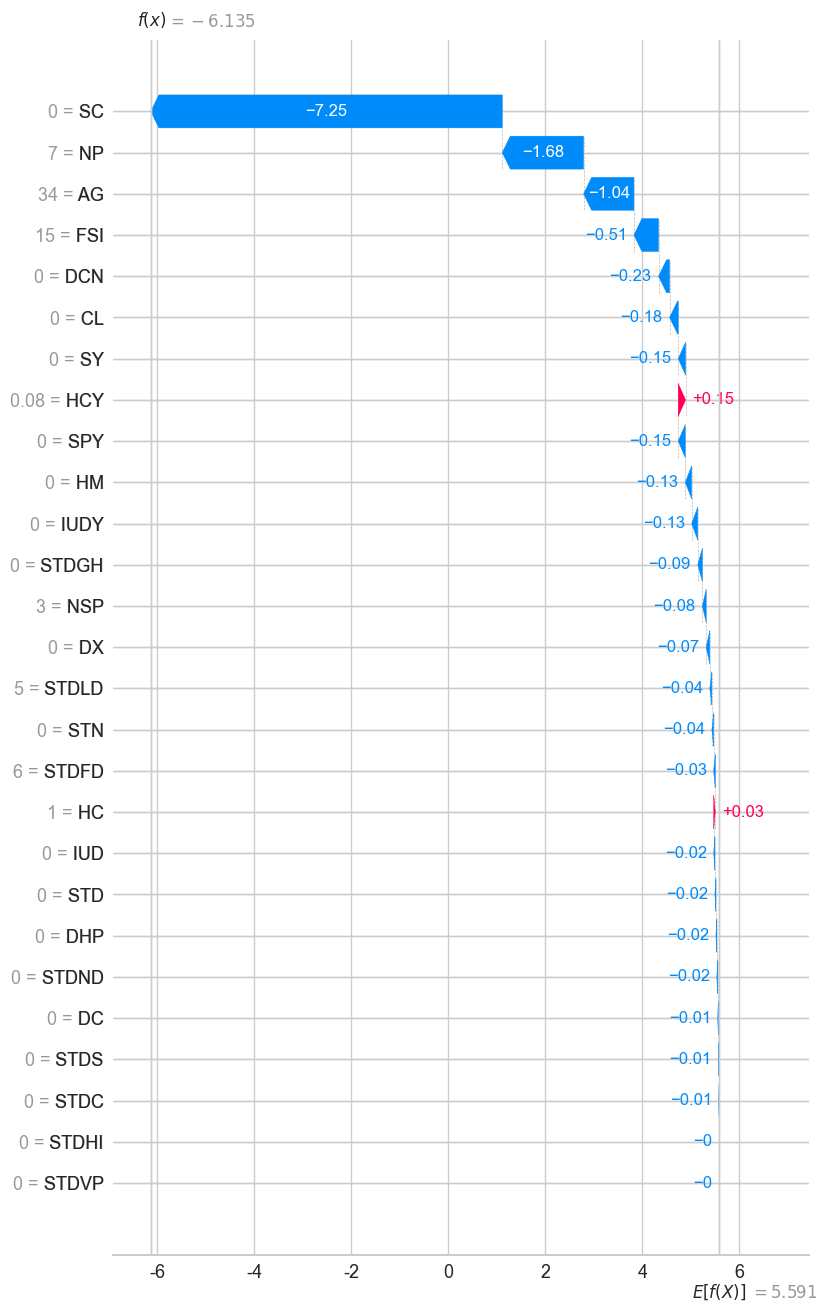

In [45]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

In [46]:
shap.plots.force(shap_values[0])

In [47]:
shap.plots.force(shap_values[0:100])

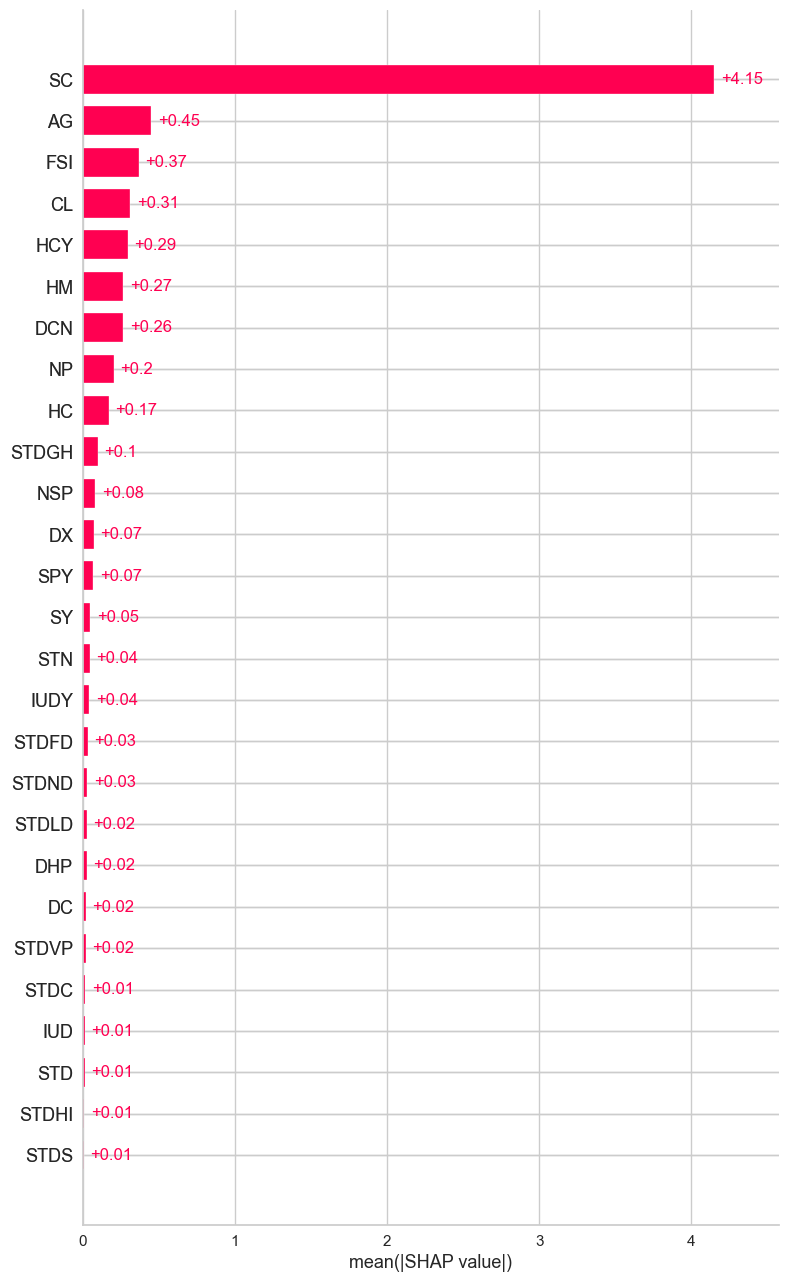

In [48]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

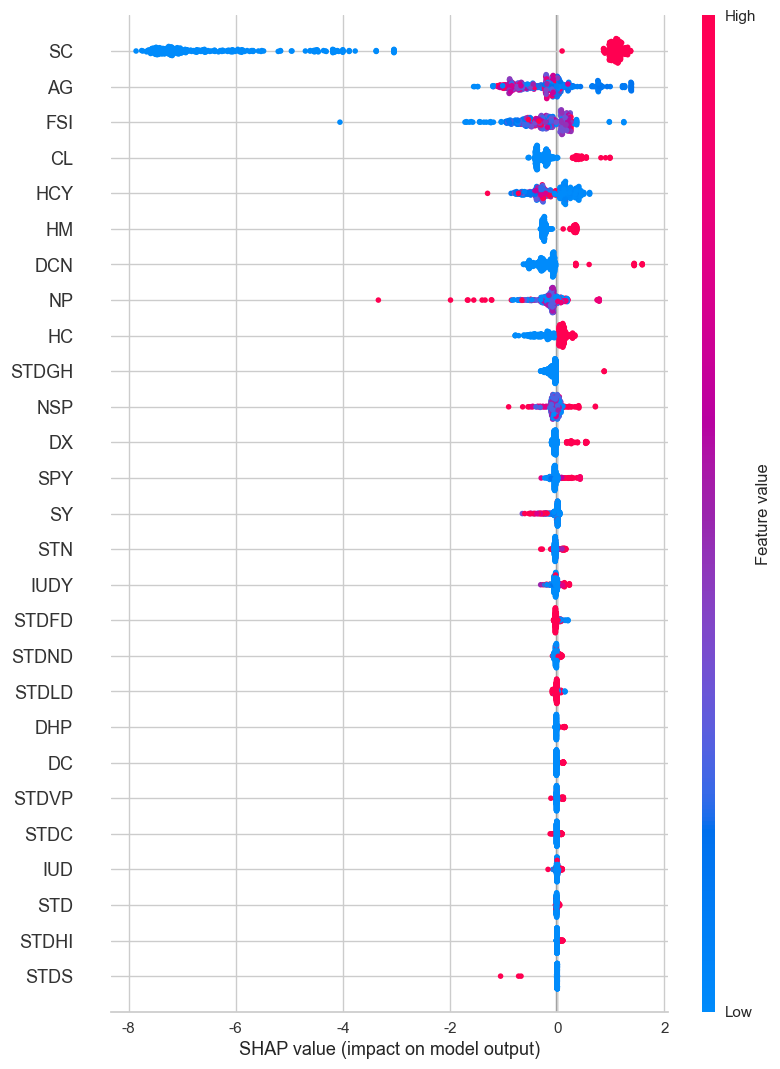

In [49]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

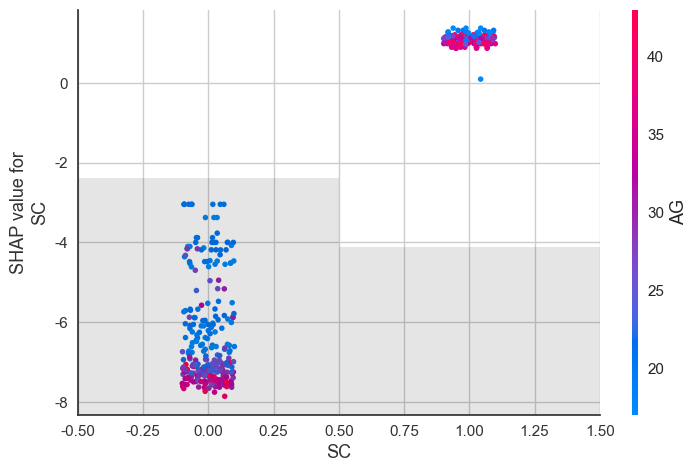

In [50]:
shap.plots.scatter(shap_values[:, "SC"],
                   color=shap_values[:, "AG"])

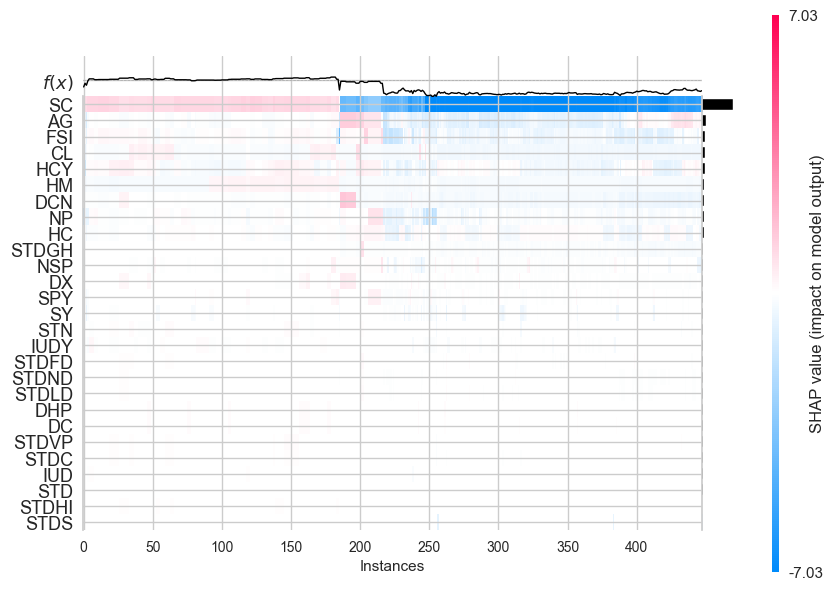

<Axes: xlabel='Instances'>

In [51]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

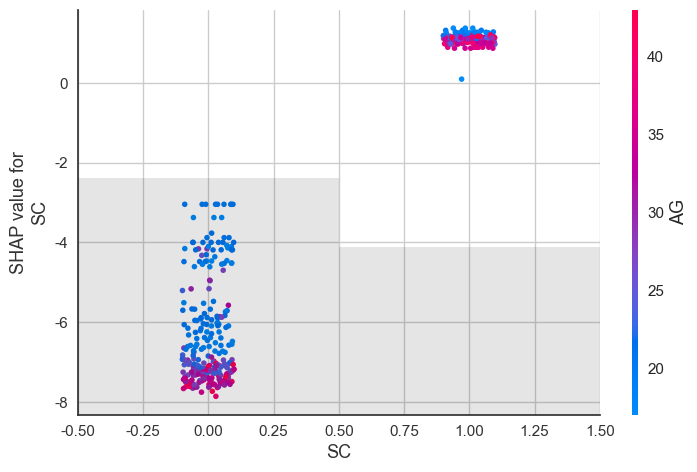

In [52]:
shap.plots.scatter(shap_values[:, "SC"], color=shap_values)

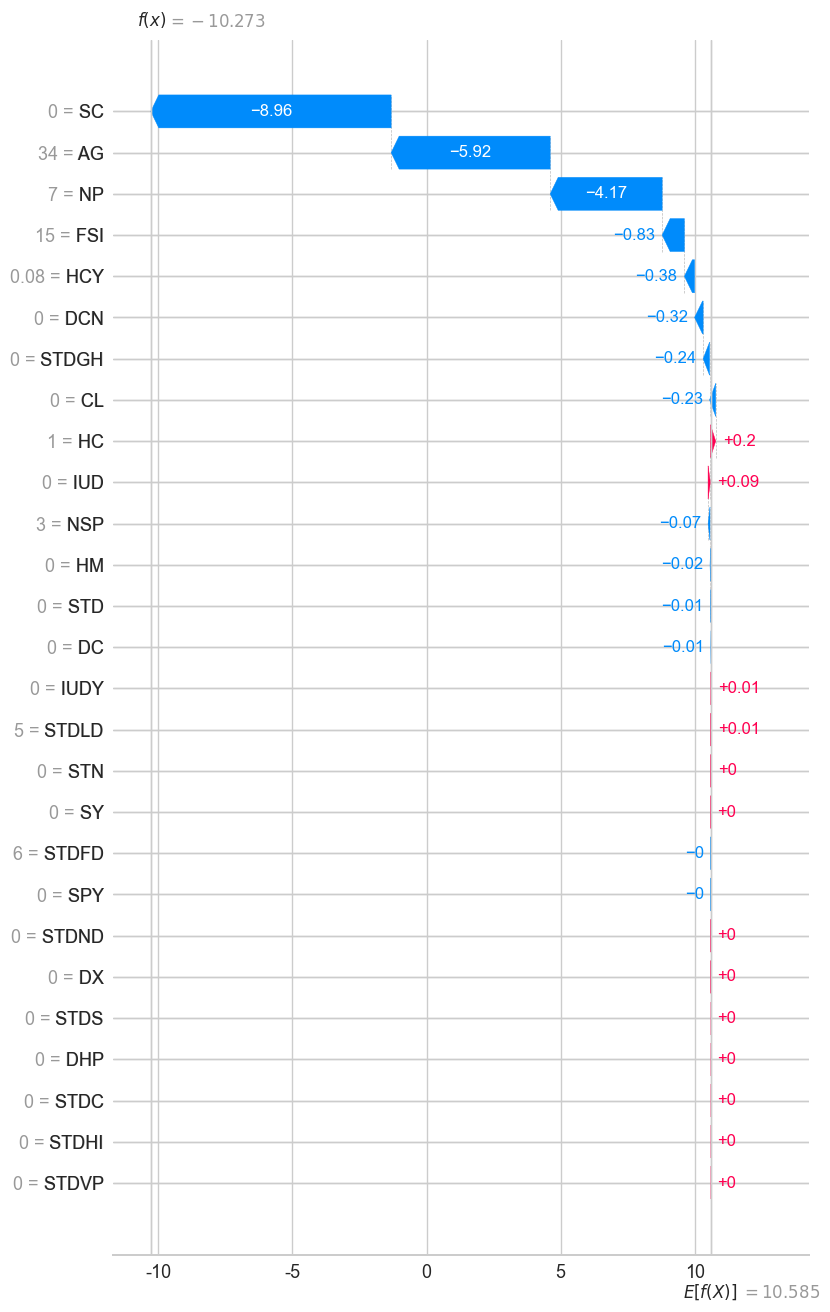

In [57]:
shap.plots.waterfall(shap_values[0], max_display=len(shap_values.feature_names))

In [58]:
shap.plots.force(shap_values[0])

In [59]:
shap.plots.force(shap_values[0:100])

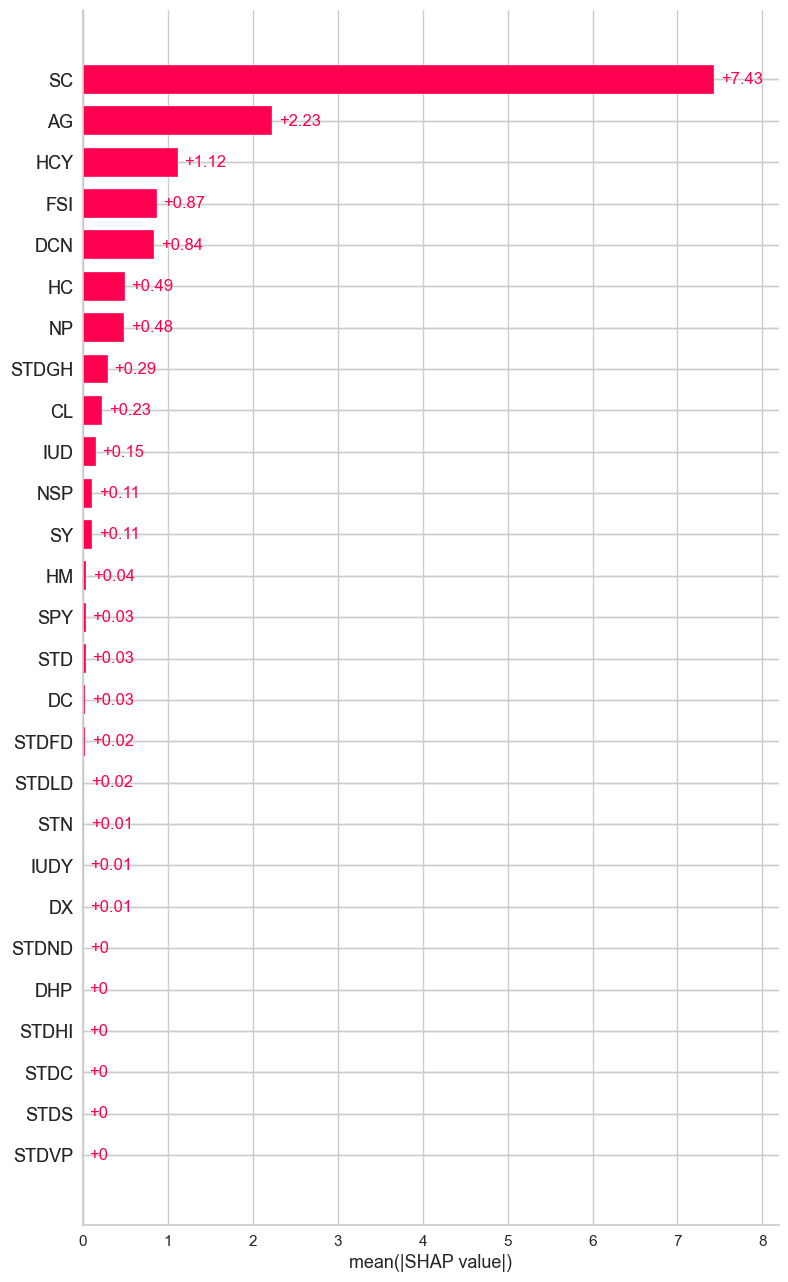

In [60]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

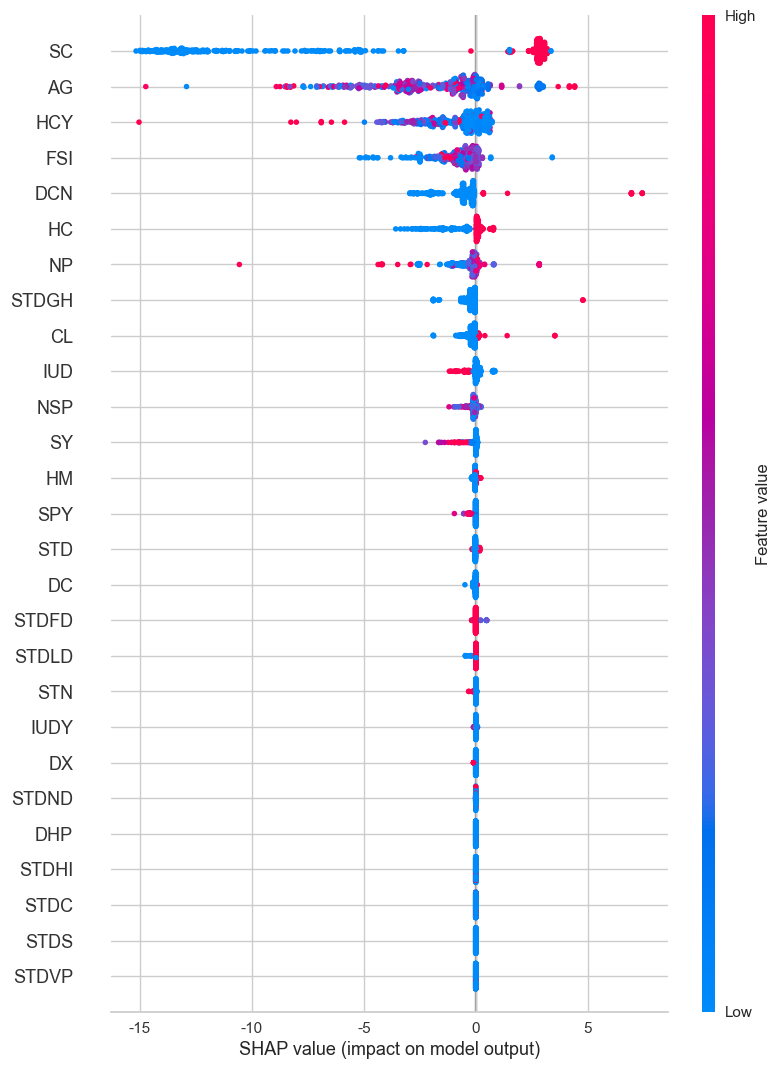

In [61]:
shap.plots.beeswarm(shap_values, max_display=len(shap_values.feature_names))

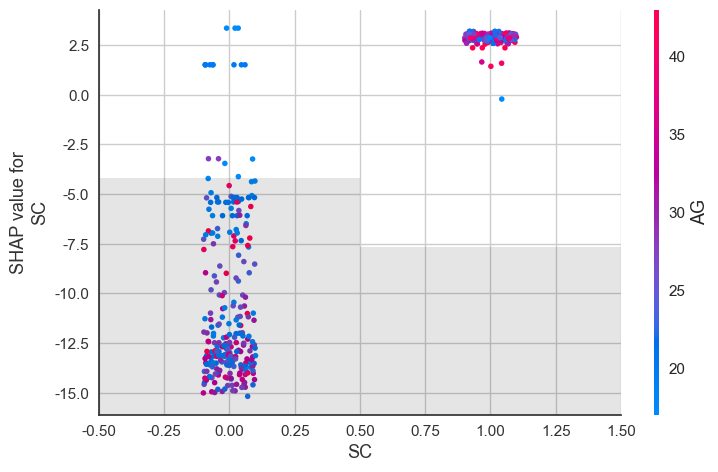

In [62]:
shap.plots.scatter(shap_values[:, "SC"],
                   color=shap_values[:, "AG"])

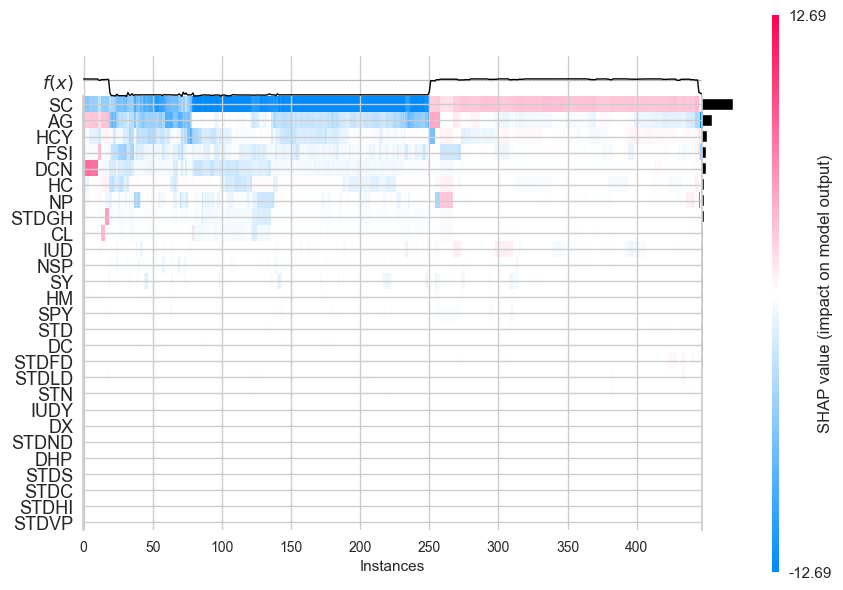

<Axes: xlabel='Instances'>

In [63]:
shap.plots.heatmap(shap_values[:1000], max_display=len(shap_values.feature_names))

## End of the Experiment